In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from qdisk.plot import Map
import pickle
from analysis_utils import cpal
%matplotlib widget
%load_ext autoreload
%autoreload 2

plt.rcParams.update(
    {"text.usetex": True, "font.family": "serif", "font.sans-serif": ["Times"]}
)

specpath = "./data/spectrum/"
sources = ["IRAS4A1", "IRAS4A2"]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


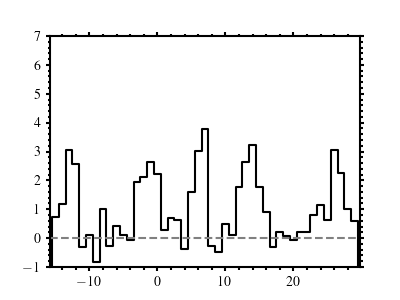

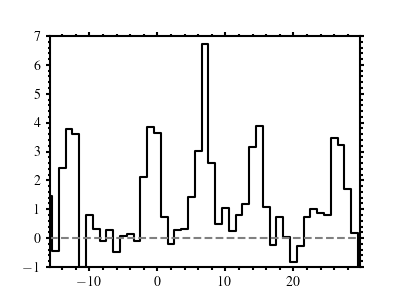

In [9]:
trans = "NH3_11"
for source in sources:
    specfilename = (
        specpath
        + f"{source}_{trans}.robust2.0.dv1.0.clean.image.pbcor.fits.spectrum.pickle"
    )
    xlim = (-15.8, 29.8)
    ylim = (-1, 7)

    with open(specfilename, "rb") as f:
        data = pickle.load(f)
    velax = data.coord.pixel_to_world(np.arange(data.spectrum.size)).quantity.to(
        u.km / u.s, equivalencies=u.doppler_radio(data.restfreq)
    )
    spec = data.spectrum.to(u.mJy / u.beam)

    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(velax, spec, drawstyle="steps-mid", color="black")
    ax.set(xlim=xlim, ylim=ylim)
    ax.axhline(y=0.0, color="grey", ls="dashed")

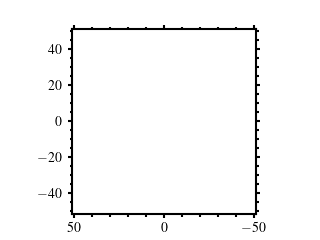

In [14]:
mom0path = "/raid/work/yamato/IRAS4A_ammonia/"
trans = "NH2D_44"
mom0name = mom0path + "IRAS4_{:s}.robust2.0.dv1.0.clean.image_dM0.fits".format(trans)

mom0map = Map(mom0name)
mom0map.plot_colormap(cmap=cpal, vmin=0.0)